In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. +np.random.normal(0, 10., size=100)

In [3]:
def demean(X):
    return X - np.mean(X, axis=0) #每个特征的矩阵减去这个特征的均值

X = demean(X)

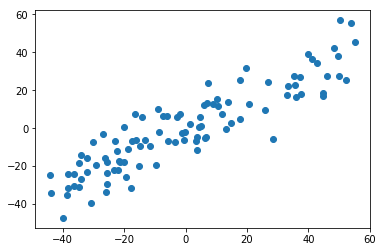

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [5]:
def f(w, X):
    return np.sum((X.dot(w)) ** 2) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2 /len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_components(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)     #注意1：每次求一个单位向量 
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
    return w

In [6]:
initial_w = np.random.random(X.shape[1])   #注意2： 不能用0向量开始
eta = 0.01
w = first_components(X, initial_w, eta)
w

array([0.78980744, 0.61335488])

In [7]:
#X2 = np.empty(X.shape)
#for i in range(len(X)):
#    X2[i] = X[i] - X[i].dot(w) * w
X2 = X - X.dot(w).reshape(-1, 1) * w      #向量化求解，比for循环更加快。X.dot(w):X中每个元素映射到w上的模；

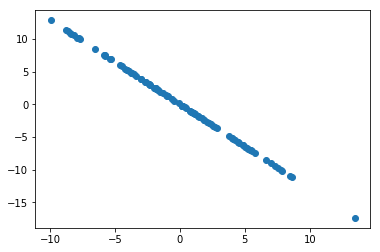

In [8]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [9]:
w2 = first_components(X2, initial_w, eta)
w2

array([-0.61335168,  0.78980993])

In [10]:
w.dot(w2)    #垂直关系

4.050897412455345e-06

In [11]:
w

array([0.78980744, 0.61335488])

In [12]:
w.dot(w2)

4.050897412455345e-06

In [13]:
def first_n_components(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])   #把initial_w进行分装，随机化处理
        w = first_components(X_pca, initial_w, eta)     #进行主成分分析
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w       
        
    return res
    

In [15]:
first_n_components(2, X)     #只是二维数据，相对应的也就二个主成分

[array([0.78980753, 0.61335477]), array([ 0.61335959, -0.78980378])]